In [215]:
#Imports
import re
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import RandomNormal

## Question 1 & 2

In [216]:
input_file_path = "Harry potter lab dataset.txt"
input_test = "harryTest.txt"

# Function to clean and split text
def clean_and_split_text(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Remove punctuation (including speech marks)
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Split text by whitespace
    words = text.split()
    
    return words

# Get the cleaned and split words
words = clean_and_split_text(input_file_path)
testWords = clean_and_split_text(input_test)

print(words)
# print(testWords)

['he', 'found', 'it', 'a', 'lot', 'harder', 'to', 'concentrate', 'on', 'drills', 'that', 'afternoon', 'and', 'when', 'he', 'left', 'the', 'building', 'at', 'five', 'oclock', 'he', 'was', 'still', 'so', 'worried', 'that', 'he', 'walked', 'straight', 'into', 'someone', 'just', 'outside', 'the', 'door', 'sorry', 'he', 'grunted', 'as', 'the', 'tiny', 'old', 'man', 'stumbled', 'and', 'almost', 'fell', 'it', 'was', 'a', 'few', 'seconds', 'before', 'mr', 'dursley', 'realized', 'that', 'the', 'man', 'was', 'wearing', 'a', 'violet', 'cloak', 'he', 'didnt', 'seem', 'at', 'all', 'upset', 'at', 'being', 'almost', 'knocked', 'to', 'the', 'ground', 'on', 'the', 'contrary', 'his', 'face', 'split', 'into', 'a', 'wide', 'smile', 'and', 'he', 'said', 'in', 'a', 'squeaky', 'voice', 'that', 'made', 'passersby', 'stare', 'dont', 'be', 'sorry', 'my', 'dear', 'sir', 'for', 'nothing', 'could', 'upset', 'me', 'today', 'rejoice', 'for', 'you', 'knowwho', 'has', 'gone', 'at', 'last', 'even', 'muggles', 'like', '

In [217]:
len(words)
# len(testWords)

298

In [218]:
sum(pd.Series(words).duplicated())
# sum(pd.Series(testWords).duplicated())

127

## Question 3

In [219]:
words_series = pd.Series(words)
unique_words = words_series.drop_duplicates().tolist()
print(unique_words)

words_series_test = pd.Series(testWords)
unique_words_test = words_series_test.drop_duplicates().tolist()

['he', 'found', 'it', 'a', 'lot', 'harder', 'to', 'concentrate', 'on', 'drills', 'that', 'afternoon', 'and', 'when', 'left', 'the', 'building', 'at', 'five', 'oclock', 'was', 'still', 'so', 'worried', 'walked', 'straight', 'into', 'someone', 'just', 'outside', 'door', 'sorry', 'grunted', 'as', 'tiny', 'old', 'man', 'stumbled', 'almost', 'fell', 'few', 'seconds', 'before', 'mr', 'dursley', 'realized', 'wearing', 'violet', 'cloak', 'didnt', 'seem', 'all', 'upset', 'being', 'knocked', 'ground', 'contrary', 'his', 'face', 'split', 'wide', 'smile', 'said', 'in', 'squeaky', 'voice', 'made', 'passersby', 'stare', 'dont', 'be', 'my', 'dear', 'sir', 'for', 'nothing', 'could', 'me', 'today', 'rejoice', 'you', 'knowwho', 'has', 'gone', 'last', 'even', 'muggles', 'like', 'yourself', 'should', 'celebrating', 'this', 'happy', 'day', 'hugged', 'around', 'middle', 'off', 'stood', 'rooted', 'spot', 'had', 'been', 'by', 'complete', 'stranger', 'also', 'thought', 'called', 'muggle', 'whatever', 'rattled'

In [220]:
sum(pd.Series(unique_words).duplicated())
# sum(pd.Series(unique_words_test).duplicated())

0

In [221]:
len(unique_words)

171

## Question 4

In [222]:
def one_hot_vectors(words):
    # Create a dictionary to map each
    # unique word to an index
    word_to_index = {}
    for i, word in enumerate(words):
        word_to_index[word] = i
    
    # Create one-hot encoded vectors for
    # each word in the corpus
    one_hot_vectors = []
    for word in words:
        vector = np.zeros(len(words))
        vector[word_to_index[word]] = 1
        one_hot_vectors.append(vector)

    return one_hot_vectors

In [223]:
encoded_words = one_hot_vectors(unique_words)

In [224]:
encoded_words

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [225]:
len(encoded_words)

171

## QUESTION 5

In [226]:
def create_context_dataset(words, window_size=2):
    context_pairs = []

    for i in range(window_size, len(words) - window_size):
        input_word = words[i]
        context_words = words[i - window_size:i] + words[i + 1:i + 1 + window_size]

        for context_word in context_words:
            context_pairs.append((input_word, context_word))
    
    return context_pairs

context_pairs = create_context_dataset(words)
context_test = create_context_dataset(testWords)

for pair in context_pairs:
    print(f"Input 1 (Word): {pair[0]}, Label (Context Word): {pair[1]}")

# for pair in context_test:
#     print(f"Input 2 (Word): {pair[0]}, Label (Context Word): {pair[1]}")

Input 1 (Word): it, Label (Context Word): he
Input 1 (Word): it, Label (Context Word): found
Input 1 (Word): it, Label (Context Word): a
Input 1 (Word): it, Label (Context Word): lot
Input 1 (Word): a, Label (Context Word): found
Input 1 (Word): a, Label (Context Word): it
Input 1 (Word): a, Label (Context Word): lot
Input 1 (Word): a, Label (Context Word): harder
Input 1 (Word): lot, Label (Context Word): it
Input 1 (Word): lot, Label (Context Word): a
Input 1 (Word): lot, Label (Context Word): harder
Input 1 (Word): lot, Label (Context Word): to
Input 1 (Word): harder, Label (Context Word): a
Input 1 (Word): harder, Label (Context Word): lot
Input 1 (Word): harder, Label (Context Word): to
Input 1 (Word): harder, Label (Context Word): concentrate
Input 1 (Word): to, Label (Context Word): lot
Input 1 (Word): to, Label (Context Word): harder
Input 1 (Word): to, Label (Context Word): concentrate
Input 1 (Word): to, Label (Context Word): on
Input 1 (Word): concentrate, Label (Context Wor

## Question 6

In [227]:
vocab_size = len(unique_words)
word_to_index = {word: idx for idx, word in enumerate(unique_words)}

# Prepare training data
def word_to_one_hot(word, word_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

X_train = []
y_train = []

for input_word, context_word in context_pairs:
    X_train.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_train.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_train = np.array(X_train)
y_train = np.array(y_train)

# Define the model with small random Gaussian weights
initializer = RandomNormal(mean=0.0, stddev=0.05)  # small random values

model = Sequential([
    Input(shape=(vocab_size,)),
    Dense(200, activation='relu', kernel_initializer=initializer),  # Linear hidden layer
    Dense(vocab_size, activation='softmax', kernel_initializer=initializer)  # Output layer
])

# Compile the model with a large learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

history.history


Epoch 1/50
37/37 - 1s - 16ms/step - accuracy: 0.0561 - loss: 4.9432
Epoch 2/50
37/37 - 0s - 1ms/step - accuracy: 0.0791 - loss: 4.4199
Epoch 3/50
37/37 - 0s - 2ms/step - accuracy: 0.1088 - loss: 3.7616
Epoch 4/50
37/37 - 0s - 2ms/step - accuracy: 0.0995 - loss: 3.0920
Epoch 5/50
37/37 - 0s - 2ms/step - accuracy: 0.0850 - loss: 2.8524
Epoch 6/50
37/37 - 0s - 2ms/step - accuracy: 0.0927 - loss: 2.7451
Epoch 7/50
37/37 - 0s - 2ms/step - accuracy: 0.1063 - loss: 2.6868
Epoch 8/50
37/37 - 0s - 2ms/step - accuracy: 0.1088 - loss: 2.6479
Epoch 9/50
37/37 - 0s - 2ms/step - accuracy: 0.1020 - loss: 2.6023
Epoch 10/50
37/37 - 0s - 2ms/step - accuracy: 0.0935 - loss: 2.5791
Epoch 11/50
37/37 - 0s - 2ms/step - accuracy: 0.0978 - loss: 2.5714
Epoch 12/50
37/37 - 0s - 1ms/step - accuracy: 0.1105 - loss: 2.5455
Epoch 13/50
37/37 - 0s - 1ms/step - accuracy: 0.0918 - loss: 2.5371
Epoch 14/50
37/37 - 0s - 1ms/step - accuracy: 0.0969 - loss: 2.5205
Epoch 15/50
37/37 - 0s - 2ms/step - accuracy: 0.1088 - l

{'accuracy': [0.05612244829535484,
  0.07908163219690323,
  0.10884353518486023,
  0.09948979318141937,
  0.08503401279449463,
  0.09268707782030106,
  0.10629251599311829,
  0.10884353518486023,
  0.10204081982374191,
  0.09353741258382797,
  0.09778911620378494,
  0.11054421961307526,
  0.09183673560619354,
  0.09693877398967743,
  0.10884353518486023,
  0.1011904776096344,
  0.11224489659070969,
  0.10374149680137634,
  0.10204081982374191,
  0.10544217377901077,
  0.09863945841789246,
  0.10204081982374191,
  0.11394558101892471,
  0.09863945841789246,
  0.09863945841789246,
  0.10034013539552689,
  0.10034013539552689,
  0.10969387739896774,
  0.11054421961307526,
  0.11139455437660217,
  0.10544217377901077,
  0.10629251599311829,
  0.10799320042133331,
  0.10544217377901077,
  0.10204081982374191,
  0.11564625799655914,
  0.11139455437660217,
  0.10799320042133331,
  0.11394558101892471,
  0.11139455437660217,
  0.10969387739896774,
  0.10969387739896774,
  0.11649660021066666,


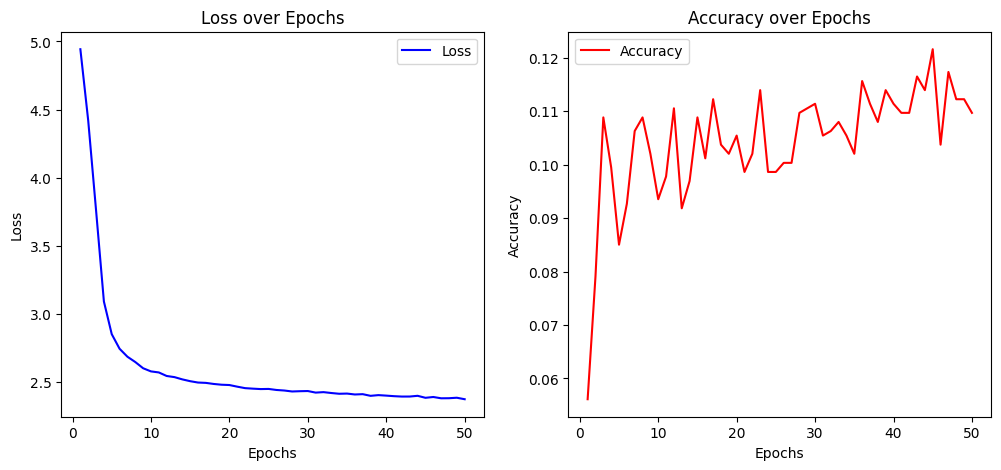

In [228]:
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'history' is available

# Extract loss and accuracy from history
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r-', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


Epoch 1/50
37/37 - 1s - 21ms/step - accuracy: 0.0595 - loss: 5.3366 - val_accuracy: 0.0461 - val_loss: 6.5314
Epoch 2/50
37/37 - 0s - 4ms/step - accuracy: 0.0731 - loss: 4.4458 - val_accuracy: 0.0128 - val_loss: 7.3961
Epoch 3/50
37/37 - 0s - 4ms/step - accuracy: 0.1114 - loss: 3.7340 - val_accuracy: 0.0183 - val_loss: 8.5178
Epoch 4/50
37/37 - 0s - 4ms/step - accuracy: 0.1020 - loss: 3.0894 - val_accuracy: 0.0361 - val_loss: 8.7134
Epoch 5/50
37/37 - 0s - 5ms/step - accuracy: 0.0995 - loss: 2.8942 - val_accuracy: 0.0133 - val_loss: 8.2094
Epoch 6/50
37/37 - 0s - 5ms/step - accuracy: 0.1080 - loss: 2.7741 - val_accuracy: 0.0200 - val_loss: 8.2344
Epoch 7/50
37/37 - 0s - 5ms/step - accuracy: 0.1003 - loss: 2.7090 - val_accuracy: 0.0167 - val_loss: 8.2332
Epoch 8/50
37/37 - 0s - 5ms/step - accuracy: 0.0969 - loss: 2.6628 - val_accuracy: 0.0161 - val_loss: 8.0185
Epoch 9/50
37/37 - 0s - 5ms/step - accuracy: 0.1029 - loss: 2.6243 - val_accuracy: 0.0256 - val_loss: 8.0763
Epoch 10/50
37/37 

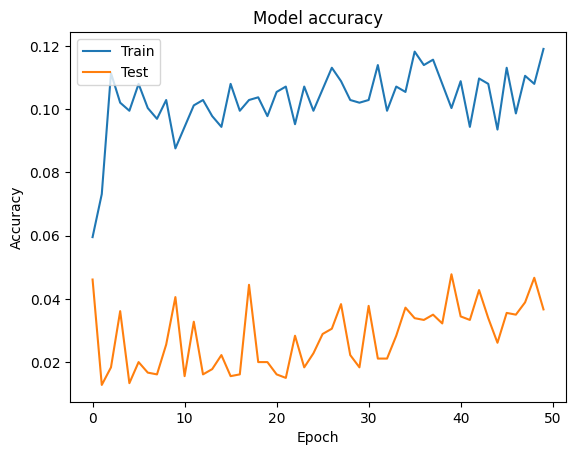

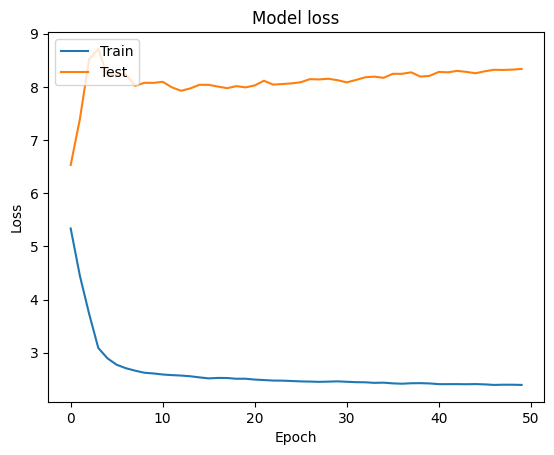

In [229]:
unique_words = list(set(unique_words + unique_words_test))

# Vocabulary size and word-to-index mapping
vocab_size = len(unique_words)
word_to_index = {word: idx for idx, word in enumerate(unique_words)}

# One-hot encoding function
def word_to_one_hot(word, word_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

# Prepare training data
X_train = []
y_train = []

for input_word, context_word in context_pairs:
    X_train.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_train.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare test data
X_test = []
y_test = []

for input_word, context_word in context_test:
    X_test.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_test.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the model with small random Gaussian weights
initializer = RandomNormal(mean=0.0, stddev=0.05)

model = Sequential([
    Input(shape=(vocab_size,)),
    Dense(200, activation='relu', kernel_initializer=initializer),  # Hidden layer
    Dense(vocab_size, activation='softmax', kernel_initializer=initializer)  # Output layer
])

# Compile the model with a large learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    verbose=2, 
    validation_data=(X_test, y_test)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Question 7

In [231]:
def get_embedding(one_hot_vector, model):
    # Extract the weights from the first layer (hidden layer)
    embedding_weights = model.layers[0].get_weights()[0]
    
    # Calculate the embedding by performing a dot product between the one-hot vector and the embedding weights
    embedding = np.dot(one_hot_vector, embedding_weights)
    
    return embedding

In [232]:
# Create a dictionary to store embeddings for each word
embeddings_dict = {}

# Loop through each word in the vocabulary
for word, index in word_to_index.items():
    # Create a one-hot vector for the current word
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[index] = 1
    
    # Get the embedding using the get_embedding function
    embedding = get_embedding(one_hot_vector, model)
    
    # Store the embedding in the dictionary
    embeddings_dict[word] = embedding

# Display embeddings for all words
for word, embedding in embeddings_dict.items():
    print(f"Word: {word}, Embedding: {embedding}")


Word: managed, Embedding: [-0.11373367 -0.04423904  0.00739297  0.13123195 -0.00484217  0.01477363
  0.03687629  0.02685695 -0.06589238 -0.0005245  -0.09006004  0.08467054
 -0.10373282 -0.00804312  0.02528435 -0.00237717  0.03249883  0.03862733
 -0.07313626 -0.02302019 -0.0419522  -0.07655191 -0.05641283 -0.00731011
 -0.03387516 -0.01550611  0.03486321 -0.05460623 -0.09223354 -0.0575332
  0.07586282  0.0334994  -0.01017469 -0.026253    0.07817747  0.05376116
  0.07363996 -0.01365597  0.05788318  0.00825889  0.01556579  0.04204479
  0.03095164  0.00124366 -0.06667884  0.00470105  0.08445027  0.01125128
  0.03116423 -0.03699245  0.11455607  0.01266581 -0.00776686 -0.05139488
  0.01516037  0.13581598  0.02472401  0.00923585 -0.02405029 -0.00108467
  0.08896342 -0.10200743 -0.00955612  0.02607239 -0.00386982 -0.01322297
  0.06005958 -0.05678314  0.08276681 -0.02920905 -0.06055039 -0.02220521
 -0.06689301  0.02963082 -0.00135682  0.01313555  0.00788769 -0.00704725
 -0.07689083  0.05020688  